# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

---

## Zestaw zadań 1: Generowanie procesów punktowych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import random
import math
sns.set() 
sns.set_theme(style="whitegrid")

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1) Generujemy punkty na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Do współrzędnych każdego z punktów dodajemy komponent losowy określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

Parametry przykładowego rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10


#### a) Przygotowanie funkcji

In [3]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    dx = (x_lim[1] - x_lim[0])/grid[0]
    dy = (y_lim[1] - y_lim[0])/grid[1]
    
    xp = np.linspace(x_lim[0]+dx/2, x_lim[-1]-dx/2, num=grid[0])
    yp = np.linspace(y_lim[0]+dy/2, y_lim[-1]-dy/2, num=grid[1])
    
    x1,y1 = np.meshgrid(xp,yp)
    #x2 = [item for sublist in x1 for item in sublist]
    x2=x1.flatten()
    y2 = [item for sublist in y1 for item in sublist]

    df1 = pd.DataFrame({'X':x2, 'Y':y2})
    for i in range(0, grid[0]*grid[1]):
        df1['X'][i] += random_component*np.random.uniform(-dx/2,dx/2)
        df1['Y'][i] += random_component*np.random.uniform(-dy/2,dy/2)
    return df1

#### b) Wygenerowanie procesu

In [4]:
# YOUR CODE HERE
# raise NotImplementedError()
df1 = regular_on_rectangle([20,10], 0.5, [0,20], [0,10])

print(df1)

             X         Y
0     0.685220  0.545845
1     1.554661  0.457949
2     2.734995  0.714876
3     3.606688  0.528520
4     4.517596  0.680215
..         ...       ...
195  15.523208  9.697867
196  16.612468  9.329478
197  17.361224  9.358737
198  18.685204  9.267166
199  19.514302  9.553025

[200 rows x 2 columns]


#### c) Wizualizacja

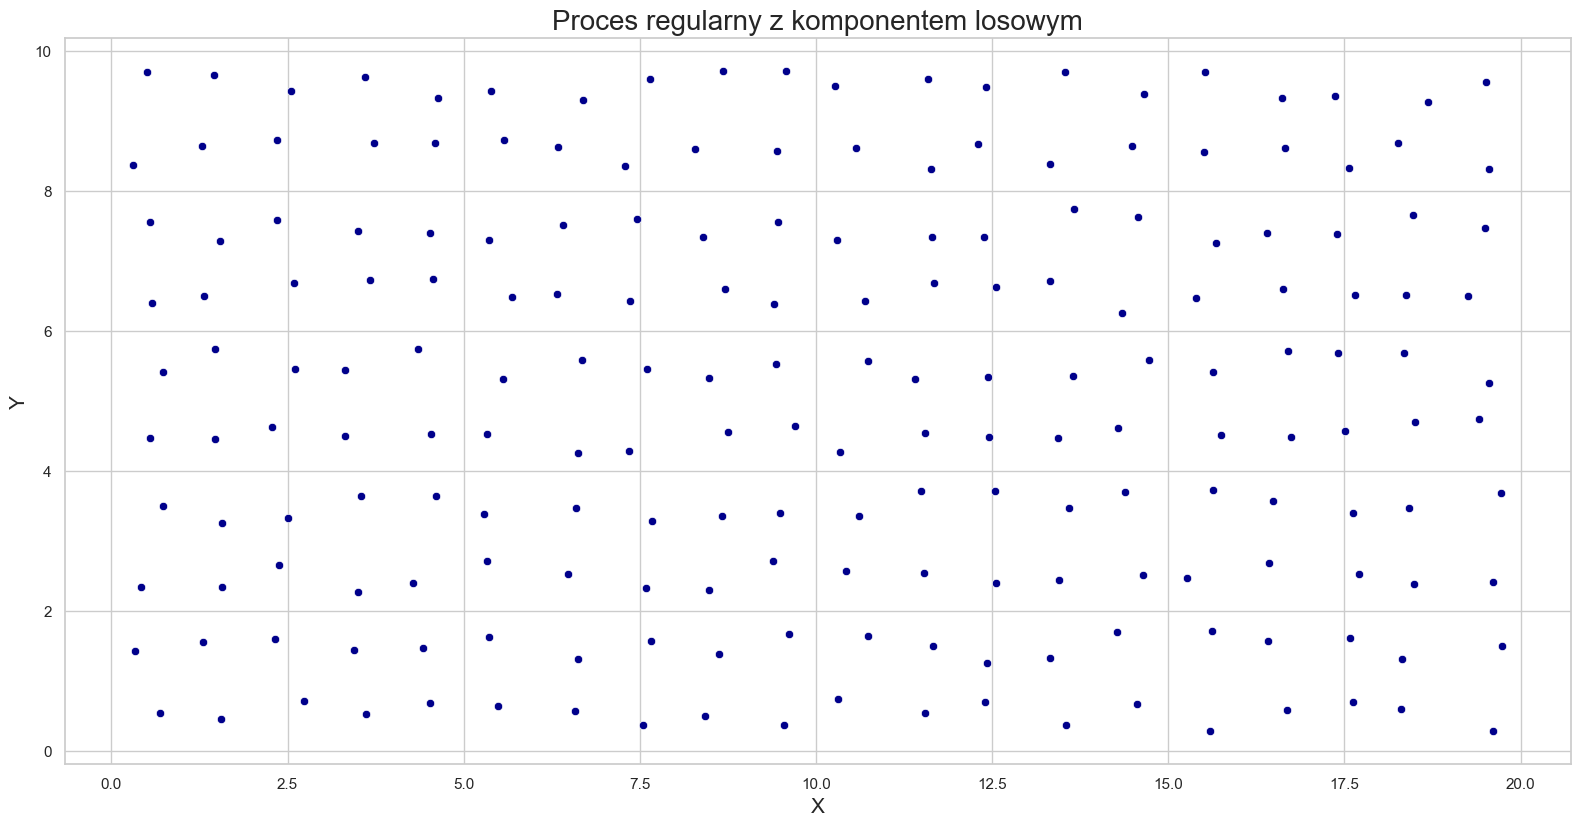

In [5]:
# YOUR CODE HERE
# raise NotImplementedError()
fig, ax = plt.subplots(1,1,figsize=(max(df1['X'])-min(df1['X']),max(df1['Y'])-min(df1['Y'])))
ax = sns.scatterplot(data=df1, x='X', y='Y', color="darkblue")
ax.set_xlabel("X", fontsize=15)
ax.set_ylabel("Y", fontsize=15)
ax.set_title('Proces regularny z komponentem losowym',fontsize=20)
plt.show()

### Zadanie 2: Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `homogeneous_poisson_on_rectangle()`, która będzie generować jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Losujemy liczbę punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Niezależnie od siebie losujemy wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

Parametry przykładowego rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [6]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    a = abs(x_lim[1] - x_lim[0]) * abs(y_lim[1] - y_lim[0])
    n = np.random.poisson(intensity*a)
    x = x_lim[0] + (x_lim[1]-x_lim[0]) * np.random.rand(n)
    y = y_lim[0] + (y_lim[1]-y_lim[0]) * np.random.rand(n)
    return pd.DataFrame({'X':x, 'Y':y})

#### b) Wygenerowanie procesu

In [7]:
# YOUR CODE HERE
# raise NotImplementedError()
df2 = homogeneous_poisson_on_rectangle(10,[0,20],[0,10])
print(df2)

              X         Y
0     10.833222  7.607861
1      6.452070  9.845261
2     13.856302  9.044189
3     19.946227  9.810577
4      4.298041  2.577324
...         ...       ...
1980  12.150748  1.481420
1981   4.894122  1.915520
1982  19.799920  3.693875
1983   1.032041  0.038119
1984  11.205399  6.442753

[1985 rows x 2 columns]


#### c) Wizualizacja

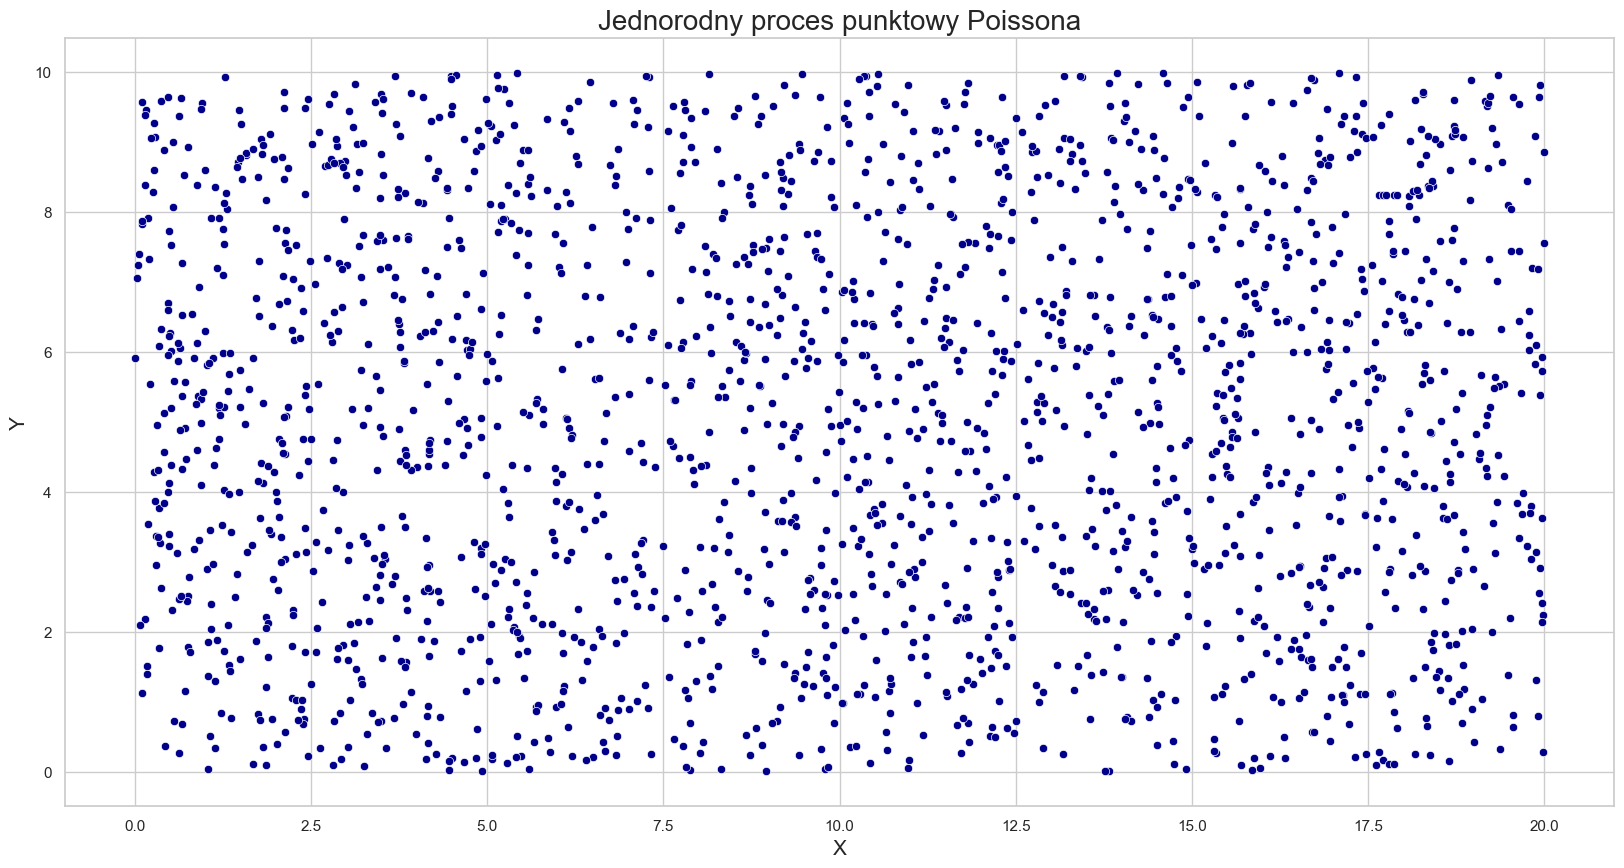

In [8]:
# YOUR CODE HERE
# raise NotImplementedError()
fig, ax = plt.subplots(1,1,figsize=(max(df2['X'])-min(df2['X']),max(df2['Y'])-min(df2['Y'])))
ax = sns.scatterplot(data=df2, x='X', y='Y', color="darkblue")
ax.set_xlabel("X", fontsize=15)
ax.set_ylabel("Y", fontsize=15)
ax.set_title('Jednorodny proces punktowy Poissona',fontsize=20)
plt.show()

### Zadanie 3: Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `unhomogeneous_poisson_on_rectangle()`, która będzie generować niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Generujemy punkty z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze.
2. Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.

Parametry przykładowego rozkładu:
 - intensywność procesu: f(x, y) = x
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [9]:
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    def fun_neg(x):
        return -intensity_function(x[0],x[1])
    
    bd = ((x_lim[0],x_lim[1]),(y_lim[0],y_lim[1]))
    print(bd)
    xy0=((x_lim[0]+x_lim[1])/2,(y_lim[0]+y_lim[1])/2)
    res = sp.optimize.minimize(fun_neg, x0=xy0, bounds=bd, tol=1e-10)
    
    intensity_max = -res.fun
    df3 = homogeneous_poisson_on_rectangle(intensity_max, x_lim, y_lim)
    
    p = len(df3)
    for i in range(0, p):
        a = 1-intensity_function(df3.X[i],df3.Y[i])/intensity_max
        if(a > np.random.random() ):
            df3.drop(index=i, inplace=True)
    
    return df3 

#### b) Wygenerowanie procesu

In [10]:
# YOUR CODE HERE
# raise NotImplementedError()
def f(par, par2):
    x, y = par, par2
    return x

df3=unhomogeneous_poisson_on_rectangle(f, [0,20], [0,10])


((0, 20), (0, 10))


#### c) Wizualizacja

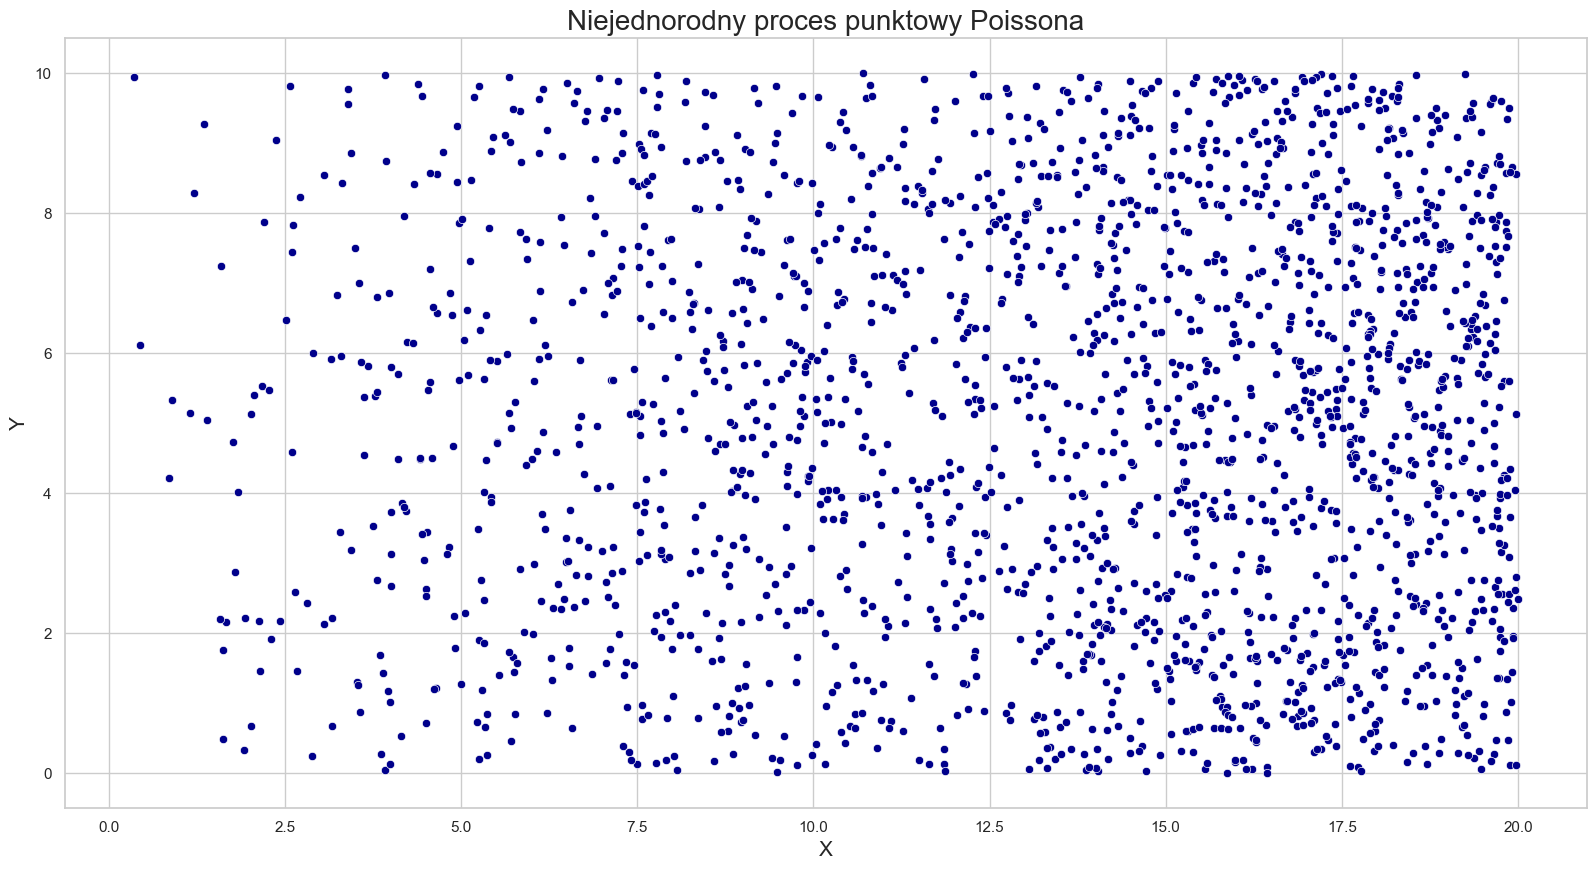

In [11]:
# YOUR CODE HERE
# raise NotImplementedError()
fig, ax = plt.subplots(1,1,figsize=(max(df3['X'])-min(df3['X']),max(df3['Y'])-min(df3['Y'])))
ax = sns.scatterplot(data=df3, x='X', y='Y', color="darkblue")
ax.set_xlabel("X", fontsize=15)
ax.set_ylabel("Y", fontsize=15)
ax.set_title('Niejednorodny proces punktowy Poissona',fontsize=20)
plt.show()

### Zadanie 4: Proces punktowy Matérna w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `materna_on_rectangle()`, która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów (okrąg o promieniu równym wartości parametru `cluster_radius`) generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [13]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    def hom_in_radius(intensity, x, y):
        a = 3.14*cluster_radius*cluster_radius
        var=intensity*a  #wartość oczekiwana
        n=np.random.poisson(var)  #liczba punktów
        wsp_los_x=[cluster_radius *random.random()*math.cos(2 * math.pi * random.random())+x for i in range(n)]
        wsp_los_y=[cluster_radius *random.random()*math.sin(2 * math.pi * random.random())+y for i in range(n)]
        
        #dataframe z współrzednymi
        df=pd.DataFrame({'X':wsp_los_x,'Y':wsp_los_y})
        return df
        
    r=cluster_radius
    x_lim_new=[x_lim[0]-r,x_lim[1]+r] #rozmiar okna powiększony o r
    y_lim_new=[y_lim[0]-r,y_lim[1]+r]
    
    h_p = homogeneous_poisson_on_rectangle(parent_intensity, [x_lim_new[0],x_lim_new[1]], [y_lim_new[0],y_lim_new[1]])
    x=h_p["X"]
    y=h_p["Y"]
    
    #dodawanie punktow w okręgu
    for i in zip(x,y):
        df=hom_in_radius(daughter_intensity,i[0],i[1])
        x=np.append(x,df["X"])
        y=np.append(y,df["Y"])
        
    tab=pd.DataFrame({'X':x, 'Y':y})
    tab = tab[(tab['X']<x_lim[1]) & (tab['X']>x_lim[0]) & (tab['Y']<y_lim[1]) & (tab['Y']>y_lim[0])]
    return tab

#### b) Wygenerowanie procesu

In [14]:
# YOUR CODE HERE
# raise NotImplementedError()
df4=materna_on_rectangle(0.2, 10, 1, [0,20], [0,10])
print(df4)

              X         Y
1      7.980247  6.995658
2     19.674596  3.632854
5      6.379905  0.537751
6      8.109684  0.559207
7      1.213817  3.675628
...         ...       ...
1582   1.232337  0.219073
1584   0.612374  0.263851
1603   5.868413  9.768701
1618   5.518805  9.795423
1629   5.040578  9.735616

[1015 rows x 2 columns]


#### c) Wizualizacja

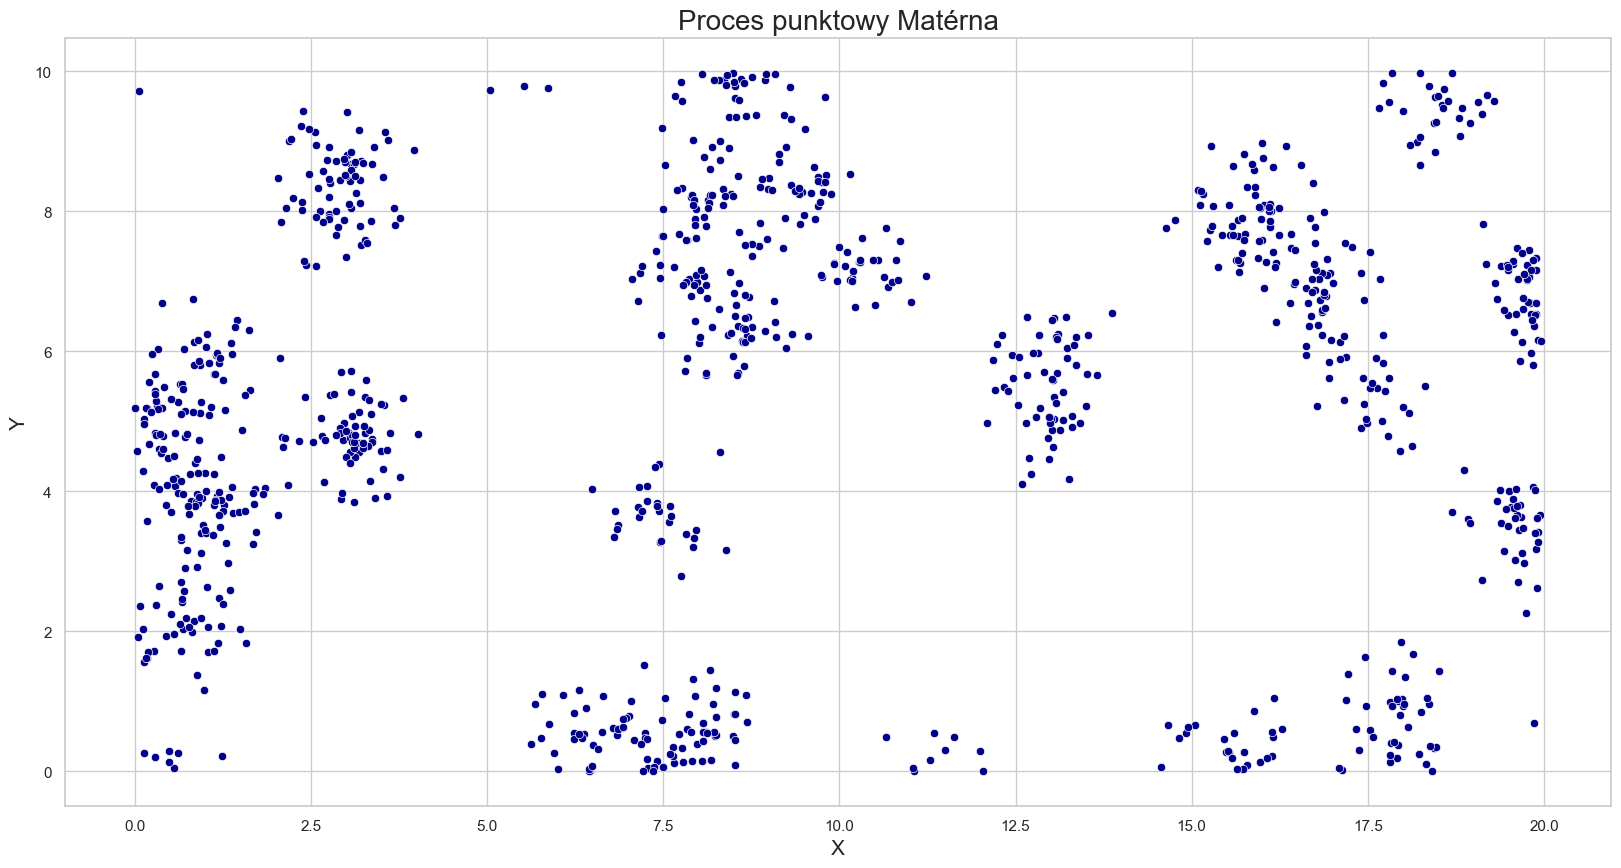

In [15]:
# YOUR CODE HERE
# raise NotImplementedError()
fig, ax = plt.subplots(1,1,figsize=(max(df4['X'])-min(df4['X']),max(df4['Y'])-min(df4['Y'])))
ax = sns.scatterplot(data=df4, x='X', y='Y', color="darkblue")
ax.set_xlabel("X", fontsize=15)
ax.set_ylabel("Y", fontsize=15)
ax.set_title('Proces punktowy Matérna',fontsize=20)
plt.show()

### Zadanie 5: Proces punktowy Thomasa w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `thomas_on_rectangle()`, która będzie generować proces punktowy Thomasa w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (na potrzeby zadania przyjmijmy 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Losujemy liczbę punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Niezależnie od siebie losujemy wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [16]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    bufor = 4 * cluster_sigma
    x_limr = [x_lim[0]-bufor, x_lim[1]+bufor]
    y_limr = [y_lim[0]-bufor, y_lim[1]+bufor]
    
    df = homogeneous_poisson_on_rectangle(parent_intensity, x_limr, y_limr)
    
    df["n"] = np.random.poisson(mean_cluster_size, len(df))
    
    x = np.empty(0)
    y = np.empty(0)
    for i in range(len(df)):
        x=np.append(x, np.random.normal(df["X"][i], cluster_sigma, df["n"][i]))
        y=np.append(y, np.random.normal(df["Y"][i], cluster_sigma, df["n"][i]))
 
    ret = pd.DataFrame({'X':x, 'Y':y})
    ret = ret[(ret['X']>x_lim[0]) & (ret['X']<x_lim[1]) & (ret['Y']>y_lim[0]) & (ret['Y']<y_lim[1])]
    
    return ret

#### b) Wygenerowanie procesu

In [17]:
# YOUR CODE HERE
# raise NotImplementedError()
df5 = thomas_on_rectangle(0.2, 30, 0.5, [0,20], [0,10])
print(df5)

              X         Y
0     12.969699  8.150822
1     13.619395  8.048336
2     12.916419  8.133925
3     13.119926  7.934256
4     13.257253  7.120688
...         ...       ...
1730  11.446799  1.981131
1731  11.380552  2.747772
1732  11.823480  2.919648
1733  11.440369  2.238775
1734  10.920518  2.433047

[1081 rows x 2 columns]


#### c) Wizualizacja

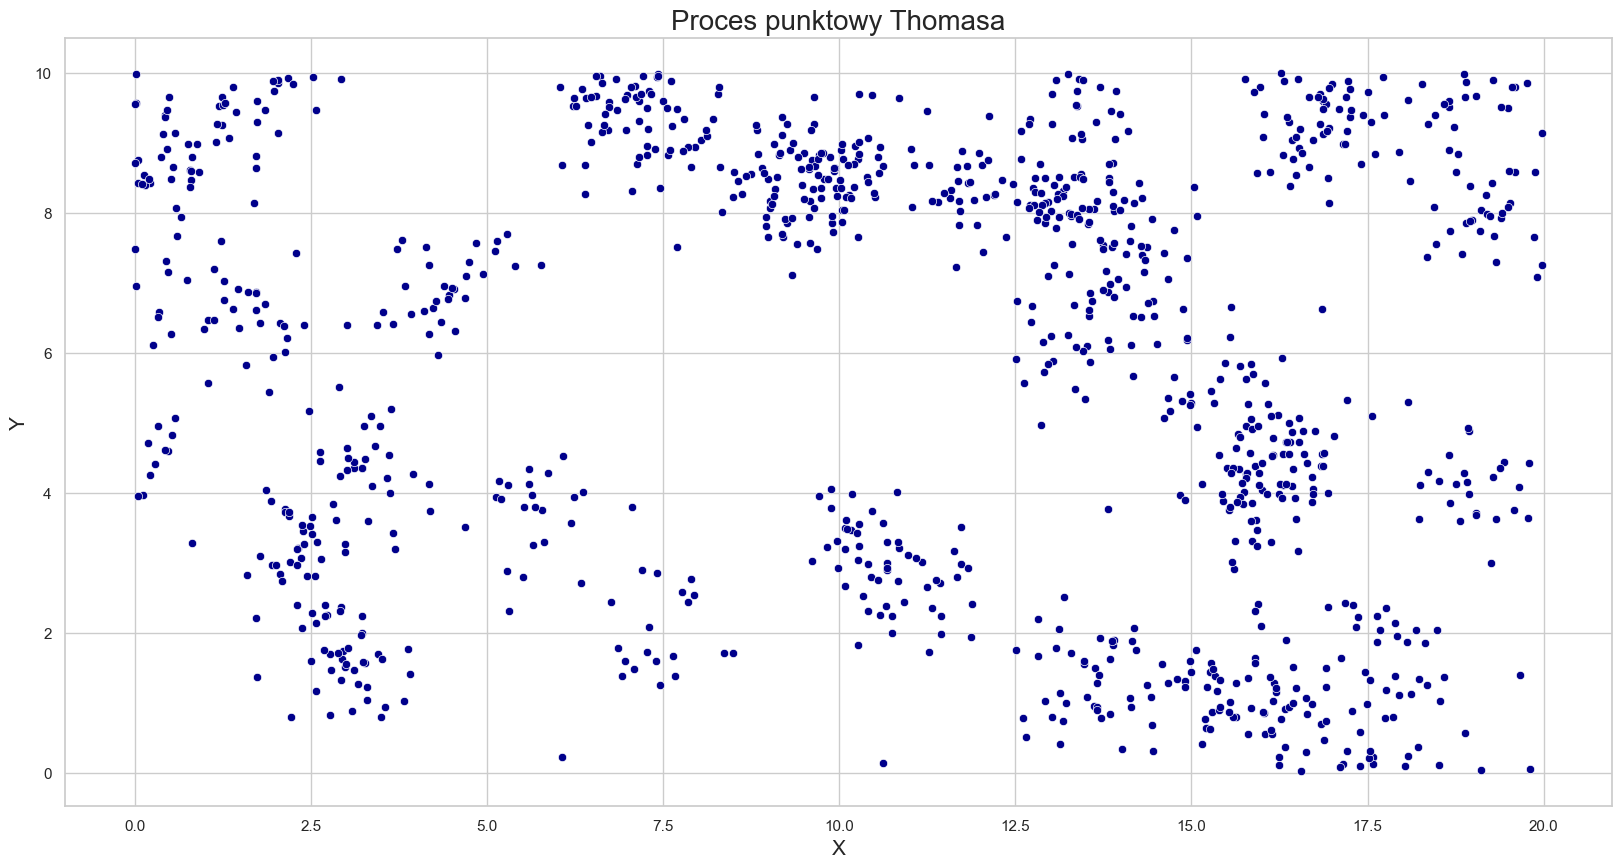

In [18]:
# YOUR CODE HERE
# raise NotImplementedError()
fig, ax = plt.subplots(1,1,figsize=(max(df5['X'])-min(df5['X']),max(df5['Y'])-min(df5['Y'])))
ax = sns.scatterplot(data=df5, x='X', y='Y', color="darkblue")
ax.set_xlabel("X", fontsize=15)
ax.set_ylabel("Y", fontsize=15)
ax.set_title('Proces punktowy Thomasa',fontsize=20)
plt.show()